In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# this allows plots to appear directly in the notebook
%matplotlib inline

## Load Boston Dataset

In [2]:
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data)

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
print( boston.feature_names )

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Add columns as feature names and PRICE from target

In [7]:
bos.columns = boston.feature_names

In [8]:
bos['PRICE']= boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Display scatter plots betweebn features

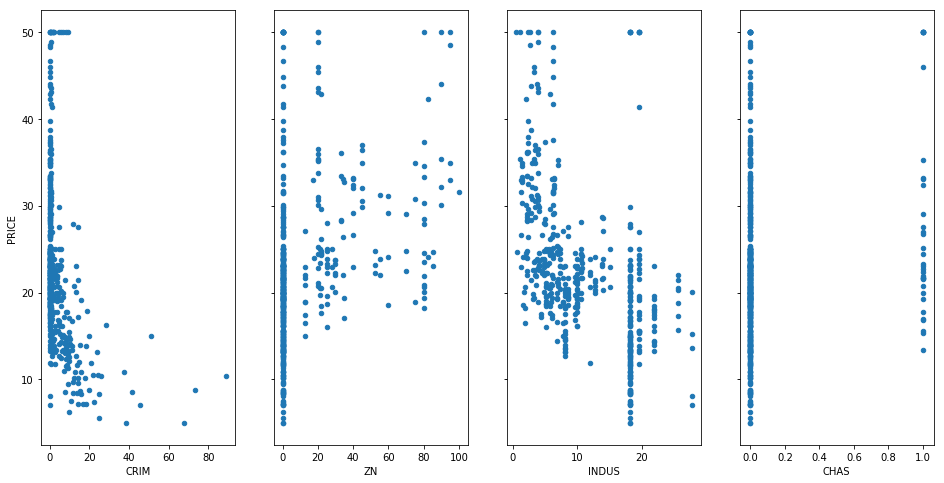

In [9]:

fig, axs = plt.subplots(1, 4, sharey=True)
bos.plot(kind='scatter', x='CRIM', y='PRICE', ax=axs[0], figsize=(16, 8))
bos.plot(kind='scatter', x='ZN', y='PRICE', ax=axs[1])
bos.plot(kind='scatter', x='INDUS', y='PRICE', ax=axs[2])
bos.plot(kind='scatter', x='CHAS', y='PRICE', ax=axs[3])


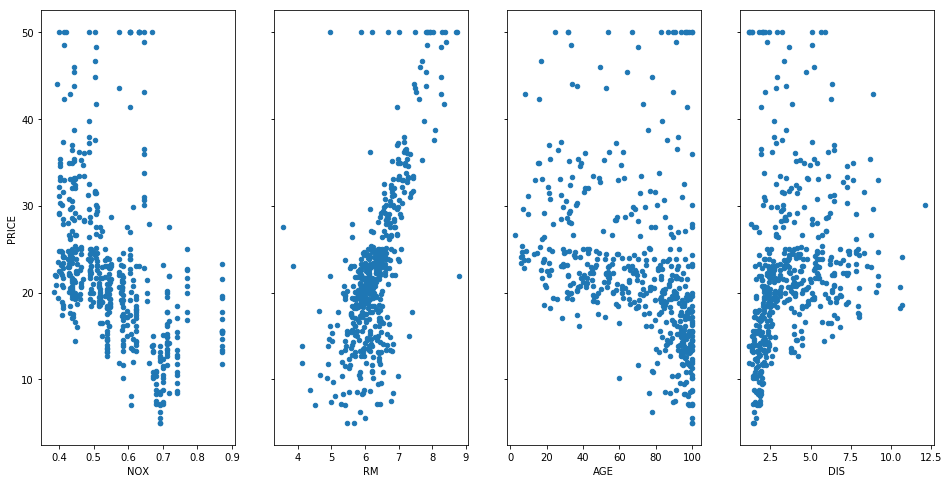

In [10]:
fig, axs = plt.subplots(1, 4, sharey=True)
bos.plot(kind='scatter', x='NOX', y='PRICE', ax=axs[0],  figsize=(16, 8))
bos.plot(kind='scatter', x='RM', y='PRICE', ax=axs[1])
bos.plot(kind='scatter', x='AGE', y='PRICE', ax=axs[2])
bos.plot(kind='scatter', x='DIS', y='PRICE', ax=axs[3])

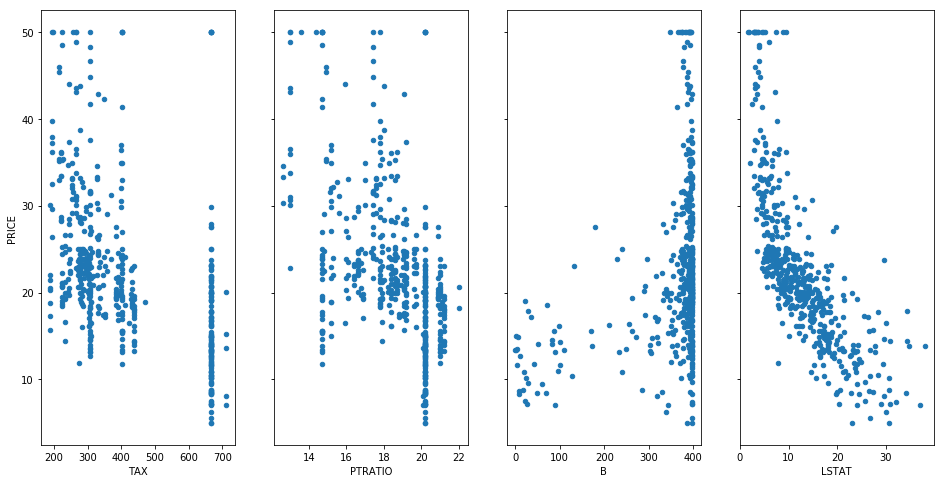

In [11]:
fig, axs = plt.subplots(1, 4, sharey=True)
bos.plot(kind='scatter', x='TAX', y='PRICE', ax=axs[0],  figsize=(16, 8))
bos.plot(kind='scatter', x='PTRATIO', y='PRICE', ax=axs[1])
bos.plot(kind='scatter', x='B', y='PRICE', ax=axs[2])
bos.plot(kind='scatter', x='LSTAT', y='PRICE', ax=axs[3])

## Split dataset into train and test

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np

In [13]:
# create X and y
feature_cols = [ 'CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_Train,X_Test,y_Train,y_Test = train_test_split(bos[feature_cols ],bos['PRICE'],test_size = 0.3,random_state=0)

In [14]:
## Use RandomForestRegressor to fit the model and calculate accuracy

In [15]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Fitting to the model
model.fit(X_Train, y_Train)
y_predict = model.predict(X_Test)
print("Prediction values: ", y_predict)

Prediction values:  [24.1  26.03 22.74 13.23 20.49 20.72 21.11 20.23 18.69 19.06 10.03 15.32
 15.58  8.71 47.62 33.95 20.35 34.12 25.54 20.31 23.83 22.77 20.15 23.66
 20.69 18.49 18.66 16.9  45.74 19.17 14.64 19.32 21.18 21.36 23.06 18.32
  8.25 24.23 14.44 14.54 22.56 21.34 21.85 14.75 23.17 23.08 18.94 17.69
 14.8  24.15 16.51 18.18 19.28 40.12 14.34 19.6  20.93 18.67 20.21 20.6
 21.88 19.55 33.76 28.88 19.05 30.09 17.25 19.01 17.58 20.08 19.91 22.96
 27.27 31.61 26.75  8.86 45.13 21.3  23.13 19.6  26.04 19.28 19.45 42.68
 41.4  24.56 21.95 14.54 24.23 15.88 18.86 13.71 23.28 31.67 21.25 22.24
 14.29 23.26 14.7  19.82 24.07 20.79 28.33 20.42 28.94 20.04  8.73 18.42
 21.01 22.54 35.32 12.09 19.68 18.62 17.   20.73  9.8  18.67  9.94 48.33
 31.31  9.62 18.3  20.05 20.94 18.48 34.04 17.93 21.35 35.15 12.94  9.89
 14.   21.16 13.06 34.21 19.91 15.14 25.28  9.01 10.71 19.74 32.29 23.99
 24.32 17.32 34.61 33.35 11.79  8.33 29.82 24.58]


In [16]:
print("Accuracy of RandomForestRegressor is: ",model.score(X_Test,y_Test))

Accuracy of RandomForestRegressor is:  0.7847288235111113
